In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'results.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['bayes_error'] = np.mean(df['bayes_error'])
df


,kernel_df,beta,bayes_error,n_source,n_target,labeled,lipton,prop-target,oracle,iter,setup,classical
0,3,3,0.004412,50,8,False,0.3750,0.500000,0.3750,39,decreasing-prop-source,NaN
1,3,3,0.004412,8,50,False,0.3700,0.780000,0.3700,25,decreasing-prop-source,NaN
2,3,3,0.004412,150,50,False,0.0500,0.640000,0.0500,61,constant-prop-source,NaN
3,3,3,0.004412,50,32,False,0.3625,0.843750,0.3625,20,decreasing-prop-source,NaN
4,3,3,0.004412,16,50,False,0.3075,0.680000,0.3075,2,decreasing-prop-source,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6155,3,3,0.004412,256,50,False,0.2700,0.660000,0.2700,48,decreasing-prop-source,NaN
6156,3,3,0.004412,12750,50,0,NaN,NaN,NaN,72,decreasing-prop-source,0.0775
6157,3,3,0.004412,3150,50,0.005,NaN,NaN,NaN,74,decreasing-prop-source,0.0475
6158,3,3,0.004412,50,512,False,0.1625,0.767578,0.1625,23,constant-prop-source,NaN


In [ ]:
df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

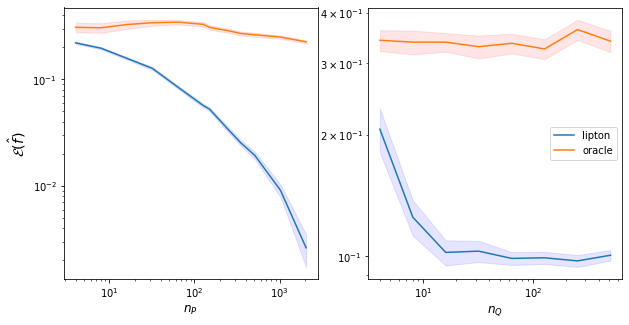

In [2]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [3]:
with open(exp + '_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        50      150         0.141710  0.019767       0.095585  0.015488
1        50      350         0.102276  0.016057       0.078008  0.014055
2        50      750         0.067103  0.016294       0.057128  0.014727
3        50     1550         0.045815  0.011021       0.040943  0.010451
4        50     3150         0.027800  0.009415       0.026058  0.009283
5        50     6350         0.014571  0.006513       0.013846  0.006370
6        50    12750         0.005016  0.004925       0.004865  0.004809
7       750       50         0.182652  0.023656       0.013137  0.006585
8      1550       50         0.182567  0.022913       0.004890  0.004673
9      3150       50         0.186131  0.024800       0.000923  0.003323
10     6350       50         0.179397  0.024568      -0.001892  0.002454
11    12750       50         0.182432  0.026733      -0.003293  0.001745

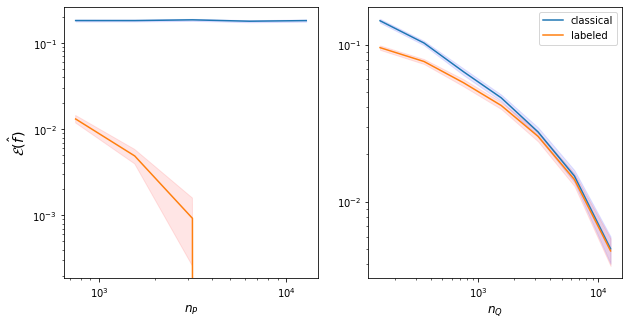

In [18]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()